# Module 3: Object Detection
****

<b>Object detection</b> is the process of identifying and locating objects of interest in an image or video using computer vision techniques. It involves detecting the presence of objects and drawing bounding boxes around them to localize them in the image or video.

The <b>Canny Edge Detector</b> is a popular edge detection technique due to its effectiveness in detecting edges while reducing noise and false edges. It can be applied to a wide range of computer vision tasks, such as object detection, image segmentation, and feature extraction.

The Canny Edge Detector leverages the edge detecting power of the Sobel Kernel and is similar to the Sobel pipeline from the last module.

<ol>
  <li><p>Smoothing: The first step is to apply Gaussian smoothing to the input image to remove noise and make the edges smoother. This is done using a Gaussian filter.</p></li>
  <li><p>Finding intensity gradients: Next, the intensity gradients of the image are calculated using the Sobel operator. The Sobel operator calculates the gradient magnitude and direction at each pixel of the image. This step highlights regions of the image where there are sudden changes in intensity.</p></li>
  <li><p>Non-maximum suppression: In this step, the gradient magnitude is thinned out by keeping only the local maxima. This is done by examining each pixel and suppressing non-maximum values. The idea is to keep only those pixels that have the highest gradient values along the direction of the gradient.</p></li>
  <li><p>Double thresholding: In this step, two thresholds are applied to the gradient magnitude to classify pixels as either strong, weak or non-edges. A pixel with a gradient magnitude higher than the upper threshold is classified as a strong edge, a pixel with a gradient magnitude lower than the lower threshold is classified as a non-edge, and a pixel with a gradient magnitude between the two thresholds is classified as a weak edge.</p></li>
  <li><p>Edge tracking by hysteresis: Finally, in this step, the weak edges are traced and connected to strong edges to form complete edges. This is done by performing edge tracking using hysteresis, which means that weak edges that are connected to strong edges are also considered strong edges.</p></li>
</ol> 

Hysteresis is a technique used in the Canny edge detector to connect weak edges to strong edges and form complete edges.

In the double thresholding step of the Canny edge detector, pixels are classified as either strong, weak, or non-edges based on their gradient magnitude. Weak edges are those pixels with a gradient magnitude between the two thresholds, which may be caused by noise or other factors.

Hysteresis is used to track and connect these weak edges to strong edges to form complete edges. The idea behind hysteresis is that if a weak edge pixel is connected to a strong edge pixel, it is likely part of an actual edge, and should be considered a strong edge itself.

To implement hysteresis, the Canny edge detector traces all the edges starting from the strong edge pixels, while ignoring the weak and non-edge pixels. When it encounters a weak edge pixel, it checks whether it is connected to a strong edge pixel. If it is, then it is considered part of the edge and marked as a strong edge. If it is not connected to a strong edge pixel, then it is ignored.



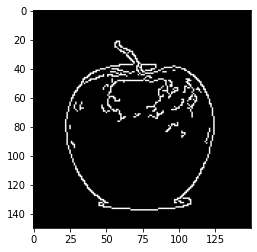

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
img = cv2.imread("../Graphics/apple.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Show the contours
plt.imshow(edges, cmap='gray')


### Contours

Contours are essentially the boundaries of objects in an image and can be used for a variety of purposes, such as object detection, recognition, and tracking.

By finding contours in an image, we can extract more detailed information about the shapes of the objects present in the image. Contours are essentially the boundaries of objects in an image, and they can be used to segment objects or regions of interest, calculate their areas or perimeters, or perform other analyses.

Moreover, by applying different contour finding algorithms in OpenCV, we can extract contours of different levels of complexity, such as finding the outermost contours, inner contours, or even hierarchical contours, which represent the nesting of objects within each other.

By using cv2.findContours(), we can extract the contours of objects in an image and then use those contours to perform various operations on the objects, such as measuring their area, computing their perimeter, or applying a mask to them. We can also use the hierarchy information returned by cv2.findContours() to analyze the topology of the objects in the image, such as determining which objects are inside or outside of other objects.

<b>image</b>: The input image. This should be a grayscale or binary image (i.e., an image with only two values: black and white). The contours are extracted from the white regions of the image.

<b>mode</b>: The mode of contour retrieval. This determines which contours are retrieved and how they are represented. The most common modes are cv2.RETR_EXTERNAL, which retrieves only the outermost contours, and cv2.RETR_TREE, which retrieves all the contours and their hierarchical relationships.

<b>method</b>: The method of contour approximation. This determines how the contours are approximated or simplified. The most common method is cv2.CHAIN_APPROX_SIMPLE, which approximates the contours using only their endpoints and discards any redundant points.

<b>offset</b>: An optional argument used to specify an offset that should be added to the coordinates of the contours. This can be useful in cases where the contours need to be drawn on a different image or at a different location.

The hierarchy array has the same number of elements as the number of contours found in the image. Each element of the hierarchy array contains four integers: [Next, Previous, First_Child, Parent]. These integers are indices of the contour hierarchy, and they have the following meanings:

<ol>
<li>Next: index of the next contour at the same hierarchical level.</li>
<li>Previous: index of the previous contour at the same hierarchical level.</li>
<li>First_Child: index of the first contour that is a child of the current contour.</li>
<li>Parent: index of the parent contour of the current contour.</li>
</ol>

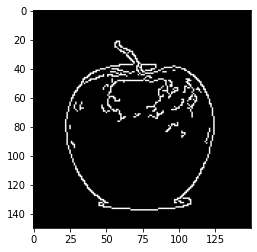

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
img = cv2.imread("../Graphics/apple.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a black image for drawing contours
contour_img = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

# Draw contours on the black image
cv2.drawContours(contour_img, contours, -1, (255, 255, 255), 1)

# Show the contours
plt.imshow(contour_img, cmap='gray')


Contour 0: Next: -1, Prev: -1, Child: 1, Parent: -1
Contour 1: Next: 2, Prev: -1, Child: -1, Parent: 0
Contour 2: Next: 3, Prev: 1, Child: -1, Parent: 0
Contour 3: Next: 4, Prev: 2, Child: -1, Parent: 0
Contour 4: Next: 5, Prev: 3, Child: -1, Parent: 0
Contour 5: Next: 6, Prev: 4, Child: -1, Parent: 0
Contour 6: Next: 30, Prev: 5, Child: 7, Parent: 0
Contour 7: Next: 8, Prev: -1, Child: -1, Parent: 6
Contour 8: Next: 9, Prev: 7, Child: -1, Parent: 6
Contour 9: Next: 10, Prev: 8, Child: -1, Parent: 6
Contour 10: Next: 11, Prev: 9, Child: -1, Parent: 6
Contour 11: Next: 12, Prev: 10, Child: -1, Parent: 6
Contour 12: Next: 13, Prev: 11, Child: -1, Parent: 6
Contour 13: Next: 14, Prev: 12, Child: -1, Parent: 6
Contour 14: Next: 15, Prev: 13, Child: -1, Parent: 6
Contour 15: Next: 16, Prev: 14, Child: -1, Parent: 6
Contour 16: Next: 17, Prev: 15, Child: -1, Parent: 6
Contour 17: Next: 18, Prev: 16, Child: -1, Parent: 6
Contour 18: Next: 19, Prev: 17, Child: -1, Parent: 6
Contour 19: Next: 2

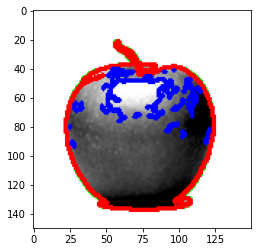

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale
image = cv2.imread("../Graphics/apple.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Find contours and hierarchy
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Loop through the hierarchy array and print the hierarchy relationships
for i in range(len(contours)):
    print(f"Contour {i}: Next: {hierarchy[0][i][0]}, Prev: {hierarchy[0][i][1]}, Child: {hierarchy[0][i][2]}, Parent: {hierarchy[0][i][3]}")
    
    # Filter contours based on their hierarchy
    if hierarchy[0][i][3] == -1:
        # This is an outermost contour
        cv2.drawContours(image, contours, i, (0, 255, 0), 2)
    elif hierarchy[0][i][3] == 0:
        # This is a contour with no parent
        cv2.drawContours(image, contours, i, (255, 0, 0), 2)
    else:
        # This is a child contour
        cv2.drawContours(image, contours, i, (0, 0, 255), 2)

# Show the image with the contours
plt.imshow(image, cmap='gray')



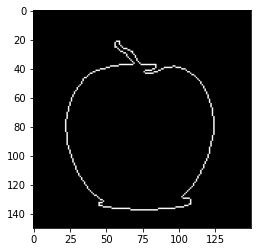

In [5]:
import cv2
import numpy as np

# Load the image and convert to grayscale
img = cv2.imread("../Graphics/apple.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a black image for drawing contours
contour_img = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

# Find outermost contours using hierarchy
outer_contours = []
# Loop through all the contours and their hierarchy information
for i in range(len(hierarchy[0])):
    # If the contour doesn't have a parent (-1), then it's an outermost contour
    if hierarchy[0][i][3] == -1:
        outer_contours.append(contours[i])

# Draw contours on the black image
cv2.drawContours(contour_img, outer_contours, -1, (255, 255, 255), 1)

# Show the contours
plt.imshow(contour_img, cmap='gray')


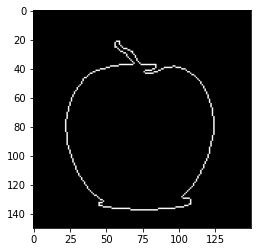

In [6]:
import cv2
import numpy as np

# Load the image and convert to grayscale
img = cv2.imread("../Graphics/apple.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours
min_contour_area = 8300
contours_large = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > min_contour_area:
        contours_large.append(cnt)

# Create a black image for drawing contours
contour_img = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

# Draw contours on the black image
cv2.drawContours(contour_img, contours_large, -1, (255, 255, 255), 1)

# Show the contours
plt.imshow(contour_img, cmap='gray')


### Bounding Box

A bounding box is a rectangle that completely encloses an object or a region of interest in an image. It is typically represented by the coordinates of its top-left corner, as well as its width and height. Bounding boxes are useful in computer vision tasks such as object detection, where we may want to locate and isolate specific objects within an image.

We can also obtain the bounding box coordinates of a contour using the cv2.boundingRect() function. This function takes the contour as an argument and returns the (x, y) coordinates of the top-left corner of the bounding box, as well as its width and height. With this information, we can draw a bounding box around the contour using cv2.rectangle().

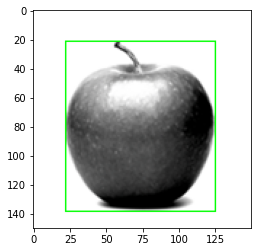

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
img = cv2.imread("../Graphics/apple.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Find contours and hierarchy
# RETR_TREE retrieves all of the contours and reconstructs a full hierarchy of nested contours
# CHAIN_APPROX_SIMPLE compresses horizontal, vertical, and diagonal segments and leaves only their end points
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Find outermost contours using hierarchy
outer_contours = []
# Loop through all the contours and their hierarchy information
for i in range(len(hierarchy[0])):
    # If the contour doesn't have a parent (-1), then it's an outermost contour
    if hierarchy[0][i][3] == -1:
        outer_contours.append(contours[i])

# Draw bounding box around outermost contours
for cnt in outer_contours:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)

# Show the image with bounding box
plt.imshow(img, cmap='gray')


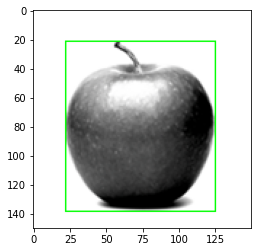

In [8]:
import cv2
import matplotlib.pyplot as plt

# Load the image and convert to grayscale
img = cv2.imread("../Graphics/apple.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 100, 200)

# Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small contours
min_contour_area = 8300
contours_large = []
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > min_contour_area:
        contours_large.append(cnt)

# Draw bounding box around large contours
for cnt in contours_large:
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)

# Show the image with bounding box
plt.imshow(img, cmap='gray')

